*Задание 4
В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с кредитными данными: Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015).
Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта Kaggle.com по ссылке:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных.
Импортируйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#Загрузка файла из локальной файловой системы в Colab
#  from google.colab import files
#  uploaded = files.upload()
#  for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
# конец загрузки файла - имя uploaded
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1


Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму.

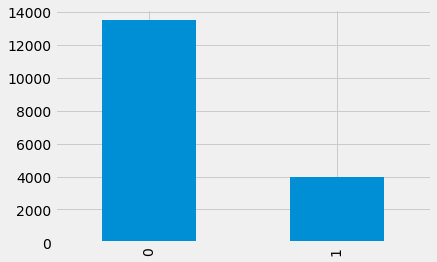

In [10]:
t=df['Class'].value_counts()
df_class_info = pd.Series(t)
df_class_info.plot.bar()
plt.show()

Затем постройте такую же диаграмму, используя логарифмический масштаб.

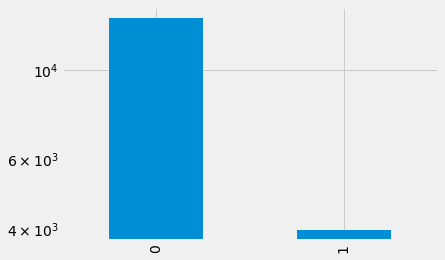

In [11]:
df_class_info.plot(kind='bar', logy=True)
plt.show()

На следующем графике постройте две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0). Подберите значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга.

In [16]:
v1_class1=df.set_index('Class')['V1'].filter(like='1', axis=0)
v1_class1=v1_class1.reset_index()
v1_class1=v1_class1.drop('Class', axis=1)
v1_class1.head(), v1_class1.count()

v1_class0=df.set_index('Class')['V1'].filter(like='0', axis=0)
v1_class0=v1_class0.reset_index()
v1_class0=v1_class0.drop('Class', axis=1)
v1_class0.head(), v1_class0.count()

(         V1
 0 -0.240874
 1  1.207007
 2 -0.779919
 3 -1.600988
 4 -0.884603, V1    13481
 dtype: int64)

Создайте легенду с двумя значениями: “Class 0” и “Class 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. Горизонтальной оси дайте название “V1”.

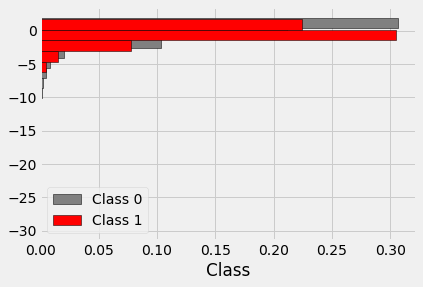

In [17]:
plt.hist(v1_class0['V1'], bins=20, color='grey', edgecolor='black', density = True, orientation='horizontal')
plt.hist(v1_class1['V1'], bins=20, color='red', edgecolor='black', density = True, orientation='horizontal')
plt.plot()
plt.xlabel('Class')
plt.legend(labels=['Class 0', 'Class 1'])